In [1]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:

# Define the directory paths
normal_dir = 'chest_xray/train/NORMAL'
pneumonia_dir = 'chest_xray/train/PNEUMONIA'

# Get the list of all files in each directory
normal_files = [os.path.join(normal_dir, file) for file in os.listdir(normal_dir)]
pneumonia_files = [os.path.join(pneumonia_dir, file) for file in os.listdir(pneumonia_dir)]

# Create a DataFrame
train_df = pd.DataFrame({
    'file': normal_files + pneumonia_files,
    'label': ['normal'] * len(normal_files) + ['pneumonia'] * len(pneumonia_files)
})

print(train_df)

                                                   file      label
0             chest_xray/train/NORMAL\IM-0115-0001.jpeg     normal
1             chest_xray/train/NORMAL\IM-0117-0001.jpeg     normal
2             chest_xray/train/NORMAL\IM-0119-0001.jpeg     normal
3             chest_xray/train/NORMAL\IM-0122-0001.jpeg     normal
4             chest_xray/train/NORMAL\IM-0125-0001.jpeg     normal
...                                                 ...        ...
3787  chest_xray/train/PNEUMONIA\person438_bacteria_...  pneumonia
3788  chest_xray/train/PNEUMONIA\person438_bacteria_...  pneumonia
3789  chest_xray/train/PNEUMONIA\person438_bacteria_...  pneumonia
3790  chest_xray/train/PNEUMONIA\person438_bacteria_...  pneumonia
3791  chest_xray/train/PNEUMONIA\person438_bacteria_...  pneumonia

[3792 rows x 2 columns]


In [3]:
# Define the directory paths
normal_dir = 'chest_xray/test/NORMAL'
pneumonia_dir = 'chest_xray/test/PNEUMONIA'

# Get the list of all files in each directory
normal_files = [os.path.join(normal_dir, file) for file in os.listdir(normal_dir)]
pneumonia_files = [os.path.join(pneumonia_dir, file) for file in os.listdir(pneumonia_dir)]

# Create a DataFrame
test_df = pd.DataFrame({
    'file': normal_files + pneumonia_files,
    'label': ['normal'] * len(normal_files) + ['pneumonia'] * len(pneumonia_files)
})

print(test_df)

                                                  file      label
0             chest_xray/test/NORMAL\IM-0001-0001.jpeg     normal
1             chest_xray/test/NORMAL\IM-0003-0001.jpeg     normal
2             chest_xray/test/NORMAL\IM-0005-0001.jpeg     normal
3             chest_xray/test/NORMAL\IM-0006-0001.jpeg     normal
4             chest_xray/test/NORMAL\IM-0007-0001.jpeg     normal
..                                                 ...        ...
619  chest_xray/test/PNEUMONIA\person96_bacteria_46...  pneumonia
620  chest_xray/test/PNEUMONIA\person96_bacteria_46...  pneumonia
621  chest_xray/test/PNEUMONIA\person97_bacteria_46...  pneumonia
622  chest_xray/test/PNEUMONIA\person99_bacteria_47...  pneumonia
623  chest_xray/test/PNEUMONIA\person99_bacteria_47...  pneumonia

[624 rows x 2 columns]


In [4]:
# Define the directory paths
normal_dir = 'chest_xray/val/NORMAL'
pneumonia_dir = 'chest_xray/val/PNEUMONIA'

# Get the list of all files in each directory
normal_files = [os.path.join(normal_dir, file) for file in os.listdir(normal_dir)]
pneumonia_files = [os.path.join(pneumonia_dir, file) for file in os.listdir(pneumonia_dir)]

# Create a DataFrame
val_df = pd.DataFrame({
    'file': normal_files + pneumonia_files,
    'label': ['normal'] * len(normal_files) + ['pneumonia'] * len(pneumonia_files)
})

print(val_df)

                                                 file      label
0     chest_xray/val/NORMAL\NORMAL2-IM-1427-0001.jpeg     normal
1     chest_xray/val/NORMAL\NORMAL2-IM-1430-0001.jpeg     normal
2     chest_xray/val/NORMAL\NORMAL2-IM-1431-0001.jpeg     normal
3     chest_xray/val/NORMAL\NORMAL2-IM-1436-0001.jpeg     normal
4     chest_xray/val/NORMAL\NORMAL2-IM-1437-0001.jpeg     normal
5     chest_xray/val/NORMAL\NORMAL2-IM-1438-0001.jpeg     normal
6     chest_xray/val/NORMAL\NORMAL2-IM-1440-0001.jpeg     normal
7     chest_xray/val/NORMAL\NORMAL2-IM-1442-0001.jpeg     normal
8   chest_xray/val/PNEUMONIA\person1946_bacteria_4...  pneumonia
9   chest_xray/val/PNEUMONIA\person1946_bacteria_4...  pneumonia
10  chest_xray/val/PNEUMONIA\person1947_bacteria_4...  pneumonia
11  chest_xray/val/PNEUMONIA\person1949_bacteria_4...  pneumonia
12  chest_xray/val/PNEUMONIA\person1950_bacteria_4...  pneumonia
13  chest_xray/val/PNEUMONIA\person1951_bacteria_4...  pneumonia
14  chest_xray/val/PNEUMO

Générateur des images

In [5]:
# Initialize the ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255.,  # scale pixel values to [0, 1]
    shear_range=0.2,  # randomly apply shearing transformations
    zoom_range=0.2,  # randomly zooming inside pictures
    horizontal_flip=True  # randomly flip half of the images horizontally
)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="file",
    y_col="label",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="file",
    y_col="label",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="file",
    y_col="label",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')


Found 3792 validated image filenames belonging to 2 classes.
Found 16 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


Création du modèle

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(150, 150, 3)),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

Entraînement du modèle

In [12]:
history = model.fit(
      train_generator,
      steps_per_epoch=1,  # nombre d'images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # nombre d'images = batch_size * steps
      verbose=2)

Epoch 1/15
1/1 - 4s - loss: 0.4181 - accuracy: 0.7500 - val_loss: 0.6373 - val_accuracy: 0.7500 - 4s/epoch - 4s/step
Epoch 2/15
1/1 - 2s - loss: 0.4689 - accuracy: 0.7500 - 2s/epoch - 2s/step
Epoch 3/15
1/1 - 1s - loss: 0.3603 - accuracy: 0.8750 - 1s/epoch - 1s/step
Epoch 4/15
1/1 - 2s - loss: 0.4784 - accuracy: 0.7812 - 2s/epoch - 2s/step
Epoch 5/15
1/1 - 1s - loss: 0.5891 - accuracy: 0.7188 - 1s/epoch - 1s/step
Epoch 6/15
1/1 - 2s - loss: 0.3364 - accuracy: 0.8438 - 2s/epoch - 2s/step
Epoch 7/15
1/1 - 1s - loss: 0.8401 - accuracy: 0.6562 - 1s/epoch - 1s/step
Epoch 8/15
1/1 - 2s - loss: 0.8724 - accuracy: 0.4688 - 2s/epoch - 2s/step
Epoch 9/15
1/1 - 2s - loss: 1.0294 - accuracy: 0.5312 - 2s/epoch - 2s/step
Epoch 10/15
1/1 - 2s - loss: 0.3940 - accuracy: 0.7812 - 2s/epoch - 2s/step
Epoch 11/15
1/1 - 1s - loss: 0.2267 - accuracy: 0.9062 - 1s/epoch - 1s/step
Epoch 12/15
1/1 - 2s - loss: 0.2888 - accuracy: 0.8125 - 2s/epoch - 2s/step
Epoch 13/15
1/1 - 1s - loss: 0.8917 - accuracy: 0.6875 

In [13]:
model.evaluate(test_generator)

20/20 [==============================] - 20s 993ms/step - loss: 0.4444 - accuracy: 0.7837


[0.4444485604763031, 0.7836538553237915]

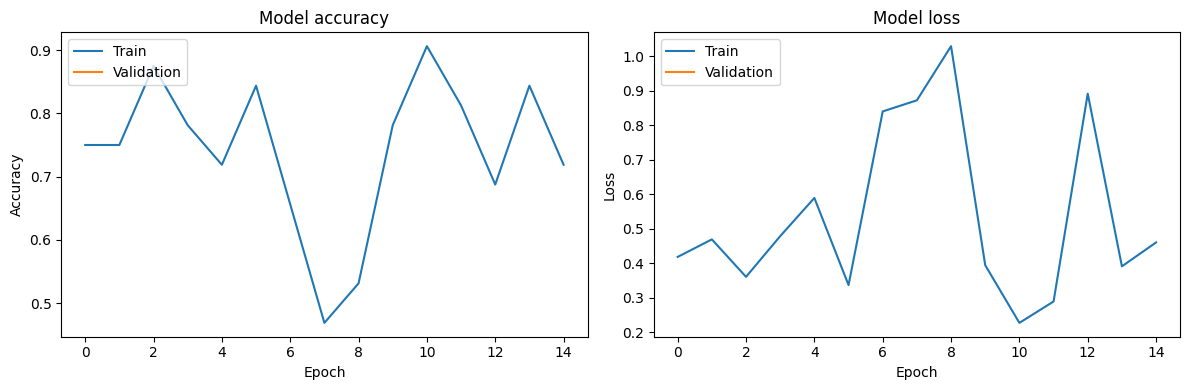

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
